In [3]:
import json

filename = 'data_meas_recycle.json'

with open(filename, 'r') as json_file:
    data = json.load(json_file)

data

{'molecule': 'H2',
 'adapt_iter': 2,
 'total_iter': 11,
 'standard_h': 15,
 'grouped_h': 5,
 'res': {'pool_name': 'GSD',
  'standard_g': 60,
  'grouped_g': 21,
  'reused_g': 16}}

H2: 30.52


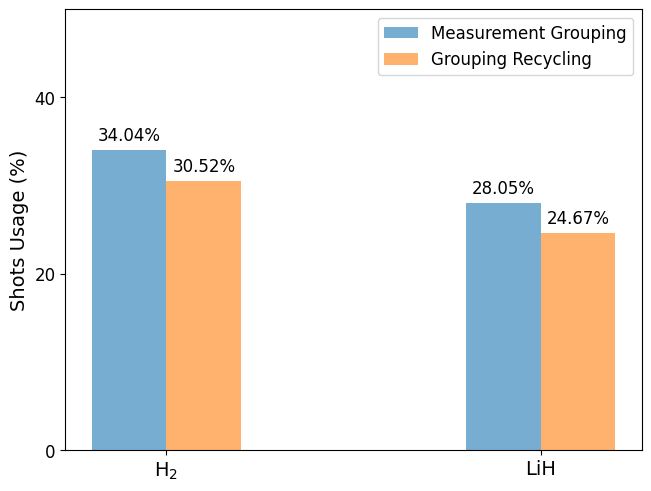

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# lih_default = 1897472
# lih_recycling = 1897472 - 196608
# h2_default = 242688
# h2_recycling = 242688 - 40960

# h2_default = 100
h2_grouping = 34.04
h2_recycling = 30.52

# h3_default = 100
h3_grouping = 28.05
h3_recycling = 24.67

print("H2:", h2_recycling)

species = ("H$_2$", "LiH")
penguin_means = {
    # 'Standard Measurement': (h2_default, h3_default),
    'Measurement Grouping': (h2_grouping, h3_grouping),
    'Grouping Recycling': (h2_recycling, h3_recycling),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

# plt.figure(figsize=(9, 10))
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, alpha=0.6)
    
    # Format labels to 2 decimal places
    ax.bar_label(rects, padding=4, fontsize=12, labels=[f'{val:.2f}%' for val in measurement])
    
    multiplier += 1

# Labels and ticks
ax.set_ylabel('Shots Usage (%)', fontsize=14)
ax.set_xticks(x + width / 2, species, fontsize=14)
ax.legend(loc='upper right', ncols=1, fontsize=12)

ax.set_ylim(0, 50)
ax.set_yticks([0, 20, 40])
ax.tick_params(axis='y', labelsize=12)

# Save and show plot
# plt.savefig('Measurement_recycling.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
